## 学习常用的网络层api
### 0.准备一张图片

size:torch.Size([3, 500, 500])


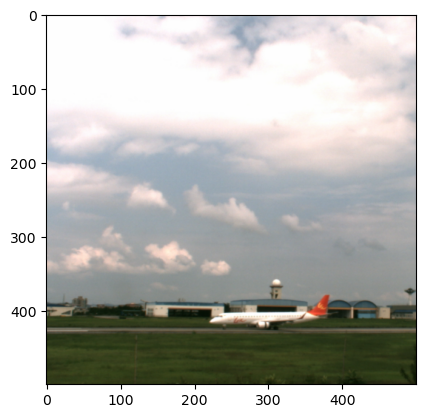

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

img2tensor=transforms.ToTensor()
tensor2img=transforms.ToPILImage()

def plot(data):
    img=data.squeeze(dim=0)
    print("size:{}".format(img.shape))
    # 将张量转换回图像
    img=tensor2img(img)
    #plot
    plt.imshow(img)
    plt.show()

image=Image.open("../../dataset/air/resize/a10.bmp")
image_tensor=img2tensor(image)
#  C*H*W to B*C*H*W 
image_tensor.unsqueeze_(dim=0)
plot(image_tensor)

### 1.卷积

size:torch.Size([3, 500, 500])


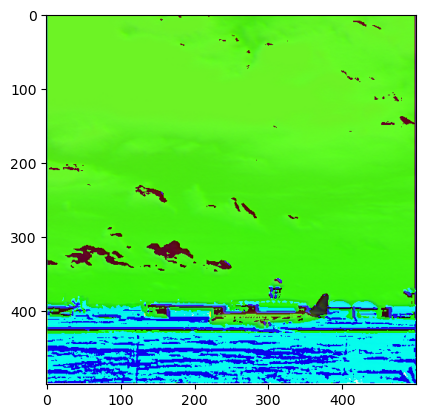

In [47]:
# 定义卷积层
conv_layer=nn.Conv2d(in_channels=3,out_channels=3,
                     kernel_size=5,stride=1,padding=2)
#放到gpu上
conv_layer.cuda()
data=image_tensor.cuda()
#foaward
data=conv_layer(data)
#plot
plot(data)

### 2.池化层

size:torch.Size([3, 250, 250])


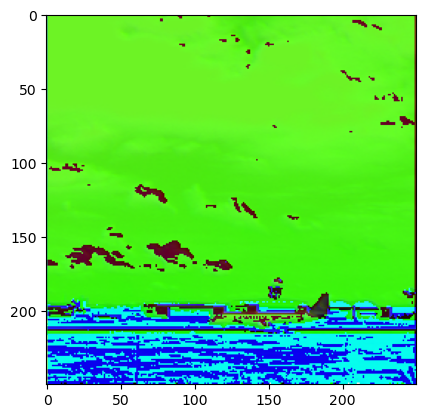

In [48]:
#池化通常将size减半
maxpool_layer=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
maxpool_layer.cuda()
pool_data=maxpool_layer(data)
plot(pool_data)

### 3.图像填充
ReflectionPad2d 镜像填充

ReplicationPad2d 边界重复值填充

ZeroPad2d 零值填充

ConstantPad2d 指定值填充

size:torch.Size([3, 330, 330])


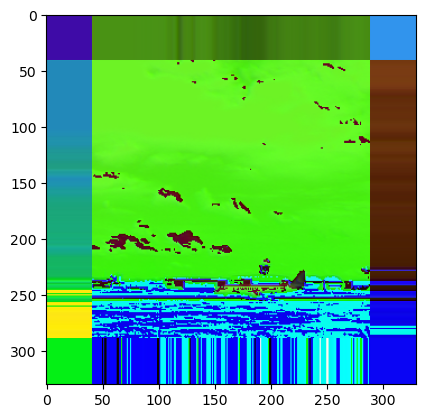

In [49]:
# 边界重复值填充40个像素
pad_layer = nn.ReplicationPad2d(40)
pad_layer.cuda()
pad_data = pad_layer(pool_data)
plot(pad_data)


### 4.归一化
GN是针对batch size小，统计的均值方差存在较大差异而提出的分组进行统计。

LN是针对RNN这样的序列网络设计的，以层为单位进行统计均值、方差。

IN是针对风格迁移这类GAN任务中，不同风格实例的差异较大，以实例为单位进行统计均值、方差。

In [9]:
image=Image.open("../../dataset/air/resize/a20.bmp")
image_tensor2=img2tensor(image)
#  与image_tensor堆叠成一个batch
image_batch=torch.stack((image_tensor.squeeze(dim=0),image_tensor2))
print(image_batch.size())
# BN归一化 num_features：特征通道数
bn = nn.BatchNorm2d(num_features=3)
bn.cuda()
image_batch=image_batch.cuda()
image_bn = bn(image_batch)
print("before:{}, \n after: {}".format(image_batch[0,0,:,:],image_bn[0,0,:,:]))




torch.Size([2, 3, 500, 500])
before:tensor([[0.9647, 0.8353, 0.9569,  ..., 0.9451, 0.9451, 0.9490],
        [0.9961, 0.9961, 0.9961,  ..., 0.9412, 0.9412, 0.9412],
        [0.9961, 0.9961, 0.9961,  ..., 0.9451, 0.9412, 0.9412],
        ...,
        [0.1804, 0.1843, 0.1961,  ..., 0.1373, 0.0824, 0.0667],
        [0.1961, 0.2000, 0.2078,  ..., 0.1373, 0.0980, 0.0706],
        [0.2039, 0.2039, 0.2078,  ..., 0.1294, 0.1137, 0.0824]],
       device='cuda:0'), 
 after: tensor([[ 1.0188,  0.5637,  0.9912,  ...,  0.9498,  0.9498,  0.9636],
        [ 1.1291,  1.1291,  1.1291,  ...,  0.9360,  0.9360,  0.9360],
        [ 1.1291,  1.1291,  1.1291,  ...,  0.9498,  0.9360,  0.9360],
        ...,
        [-1.7389, -1.7251, -1.6838,  ..., -1.8906, -2.0836, -2.1388],
        [-1.6838, -1.6700, -1.6424,  ..., -1.8906, -2.0285, -2.1250],
        [-1.6562, -1.6562, -1.6424,  ..., -1.9182, -1.9733, -2.0836]],
       device='cuda:0', grad_fn=<SliceBackward0>)
